# Introduction to Pandas

Pandas is a versatile Python package for dealing with tabular data, of the kind that you as scientists are dealing with all the time.

Pandas is, broadly speaking, built on Numpy, so the stuff you've learned is directly applicable to working with Pandas.

Pandas allows us to:

* Read in tabular data from Excel, csv, text and other sources
* Access the data using similar tools to those you've encountered with Numpy
* Join datasets together
* Generate data summaries
* plot data
* write data to file

In [ ]:
# this is the format you will often see online
import pandas as pd

# This will also work, but is more typing in the long-run:
import pandas

# This is also perfectly valid, but will get difficult quickly:
from pandas import DataFrame, Series, read_csv
df = DataFrame()

# You might see this, for pandas and other packages, please don't do it, it is bad practice.
# from pandas import *
# It imports everything from the package, and means you don't have to use any prefixes, 
# instead of pandas.DataFrame() you would just type DataFrame.


Pandas has two really useful features that distinguish it from numpy, headers and indexes. You can label columns and rows with something meaningful, instead of having to remember, or having to store them in separate objects. Using two attributes of the DataFrame `index` and `columns`. During the additional classes we've encountered object attributes like ie. the `shape` attribute of numpy arrays:

In [ ]:
import numpy as np
arr = np.random.randint(1, 100, size=(8,5))
print(arr.shape)
print(arr)

(8, 5)
[[36 28 18 90 77]
 [70 24 93 94 12]
 [66 51 97 25 99]
 [37 13 86 84 96]
 [81 66 20 43 68]
 [46 85 43 29 30]
 [58 50 58 12 30]
 [ 6 88 78 50 30]]


We can put this into a Pandas DataFrame by using the constructor `pd.DataFrame` (note the capitalisation)

In [ ]:
import pandas as pd
df = pd.DataFrame(arr)
print(df)

    0   1   2   3   4
0  51  50  81  82  64
1  70  83   6  71  78
2  75  96  54   3  79
3  60  99  97  94   2
4  20  96  15  91  33
5  89  26  10   4  11
6   1  91  23  57  52
7  68   1  72  91  60


You're used to methods, which are used as: `variable_name.method_name()`, object attributes are fixed values that are specific to the object, such as the `shape` of an array. <p>Attributes are accessed as: `variable_name.attribute` - notice the lack of brackets

Try to print the columns and index of the DataFrame

And these attributes can be overwritten, by assignment, treating the attribute as a variable:

In [ ]:
df.columns = ["Gene {}".format(x) for x in range(df.shape[1])]
print(df)

   Gene 0  Gene 1  Gene 2  Gene 3  Gene 4
0      51      50      81      82      64
1      70      83       6      71      78
2      75      96      54       3      79
3      60      99      97      94       2
4      20      96      15      91      33
5      89      26      10       4      11
6       1      91      23      57      52
7      68       1      72      91      60


Try to create a new index

A quick note on tab completion.

In your environment, some of you may have noticed that when you type things, there's a box appearing below with suggestions. If the highlighted suggestion is what you want, you can just press the `tab` key and it will insert the thing you want.

This is one of the really useful aspects of using an IDE like Spyder. Tab completion works for variable names, object methods, and a host of other things, and can speed up your programming significantly.

# Indexing with Pandas

There are three main ways to access data in a Pandas DataFrame. Firstly, indexing the column directly, in a similar way to the dictionary:

In [ ]:
df["Gene 1"]

0    50
1    83
2    96
3    99
4    96
5    26
6    91
7     1
Name: Gene 1, dtype: int64

And, like a dictionary, we can't have two columns with the same name. If you try to create a column with a name that already exists, Python will just overwrite the contents - it also won't warn you.

If we want to get multiple columns this way, we can pass a list:


In [ ]:
df[["Gene 1", "Gene 3"]]

,Gene 1,Gene 3
0,50,82
1,83,71
2,96,3
3,99,94
4,96,91
5,26,4
6,91,57
7,1,91


We can also use this method to add a new column as well:

In [ ]:
df["Gene mean"] = df.mean(axis=1)
print(df)

   Gene 0  Gene 1  Gene 2  Gene 3  Gene 4  Gene mean
0      51      50      81      82      64       65.6
1      70      83       6      71      78       61.6
2      75      96      54       3      79       61.4
3      60      99      97      94       2       70.4
4      20      96      15      91      33       51.0
5      89      26      10       4      11       28.0
6       1      91      23      57      52       44.8
7      68       1      72      91      60       58.4


The other method allows us to access either by label, or by position. Imagining the original df as a numpy array, and we could use `df[row, column]` to access a particular data point. However, this would conflict with the above method, Pandas doesn't know that this is a row, column; and will look for at best two columns, either way, throwing an error.

So, we use `df.iloc[row, column]` to access a specific data value. If we have custom labels for our columns and index, we can use the alternative 
`df.loc[row_name, column_name]`

In [ ]:
print("By index position: ", df.iloc[0, 1])
print("By column/row name: ", df.loc[0, "Gene 1"])

By index position:  76
By column/row name:  76


And at all times, you can access all of the underlying data as a numpy array, using `df.to_numpy()`

In [ ]:
df.to_numpy()

array([[61, 76,  3, 10, 67],
       [90, 24, 32,  7, 38],
       [83, 55, 99,  4, 68],
       [28, 22, 16, 84, 61],
       [66, 60,  4, 80, 51],
       [34, 11, 40, 89, 41],
       [ 3, 89,  3, 46, 89],
       [10, 28, 61, 12, 93]])

If you've tracked your flies during your experiment, pull up the data from that experiment. Otherwise, import:

In [ ]:
# Exercise 10:

# using Pandas, import the file intro_to_pandas_mice.xlsx
# Randomly modify each mouse's weight by ± 2 grams
# Randomly modify each mouse's happiness by 15 %
# print the unique IDs of all mice with happiness above 40
# print the unique ids of all male mice on drug 
# print the unique ids of all female mice not on drug 
# Create a function to calculate the average weight of the male and female mice separately.

Once you've read the Excel file (`intro_to_pandas_mice.xlsx`) in, try using the `describe` method of the DataFrame to learn a bit more about the constituent data

In [ ]:
import pandas as pd

df = pd.read_excel("./sample_data/intro_to_pandas_mice.xlsx", sheet_name="mice")
df.describe()

,weight,happiness
count,10.000000,10.000000
mean,20.287263,76.358516
std,2.306556,18.125936
min,16.093461,43.829035
25%,19.275853,64.272440
50%,20.290807,81.692564
75%,22.100664,88.919155
max,23.381724,98.241881


In [ ]:
print(df.head())

  Unnamed: 0 sex     weight  happiness treatment
0    mouse 0   M  16.093461  53.634323   no drug
1    mouse 1   F  20.383521  73.275087      drug
2    mouse 2   F  19.051272  43.829035      drug
3    mouse 3   M  19.949597  89.657870      drug
4    mouse 4   M  17.440868  77.899864      drug


In [ ]:
print(df.T)

                  0        1        2  ...        7        8        9
Unnamed: 0  mouse 0  mouse 1  mouse 2  ...  mouse 7  mouse 8  mouse 9
sex               M        F        F  ...        F        M        M
weight      16.0935  20.3835  19.0513  ...  20.1981  23.3817  21.4025
happiness   53.6343  73.2751   43.829  ...  98.2419  93.5873   86.703
treatment   no drug     drug     drug  ...     drug  no drug  no drug

[5 rows x 10 columns]


In [ ]:
df_dict = pd.read_excel("intro_to_pandas_mice.xlsx", sheet_name=None)
df_dict.keys()

dict_keys(['Arkusz1', 'mice', 'genetic_data'])

In [ ]:
df_dict.keys()
mouse_df = df_dict["mice"]
mouse_df.index = mouse_df["Unnamed: 0"]
mouse_df = mouse_df.drop("Unnamed: 0", axis=1)
mouse_df

,sex,weight,happiness,treatment
Unnamed: 0,,,,
mouse 0,M,16.093461,53.634323,no drug
mouse 1,F,20.383521,73.275087,drug
mouse 2,F,19.051272,43.829035,drug
mouse 3,M,19.949597,89.657870,drug
mouse 4,M,17.440868,77.899864,drug
mouse 5,F,22.638194,85.485264,drug
mouse 6,M,22.333376,61.271558,no drug
mouse 7,F,20.198092,98.241881,drug
mouse 8,M,23.381724,93.587267,no drug


Pandas gives us considerably more power to carry out complex operations on our data. One of the common tools you might see for this is the `join` method.

This allows us to join two DataFrames side-by-side. In order to achieve this, you often need to specify something to join 'on'. This is the element that Pandas will use to determine which rows of the DataFrames to join together. If you don't specify this, then Pandas will use the `index` that we looked at earlier. If you have a data column that contains some kind of unique identifier, then you can also join on that instead, just give the name of the column (although this dataset may not have a column like this):

```
mouse_data.join(genetic_data, on="column_name", how="method")
```

This method has an additional argument: `how`. This specifies the order in which they should be joined, this can have a very big difference in what comes out. Common values are: "left", "right", "inner", "outer"

The Excel file has two sheets, "mice" and "genetic_data" - read both as variables (look at the documents to learn how to specify which sheet you'd like to read in). Try joining them in different ways, and see what this does to your data.

In [ ]:
mouse_df = pd.read_excel('intro_to_pandas_mice.xlsx', sheet_name='mice', index_col=0)
gene_df = pd.read_excel('intro_to_pandas_mice.xlsx', sheet_name='genetic_data', index_col=0)
mouse_df = mouse_df.join(gene_df, how="left")
print(mouse_df)
mouse_df.join()

        sex     weight  happiness treatment  Gene 1  Gene 2  Gene 3
mouse 0   M  16.093461  53.634323   no drug    1.00     1.0    3.00
mouse 1   F  20.383521  73.275087      drug     NaN     NaN     NaN
mouse 2   F  19.051272  43.829035      drug     NaN     NaN     NaN
mouse 3   M  19.949597  89.657870      drug     NaN     NaN     NaN
mouse 4   M  17.440868  77.899864      drug    1.25     1.0    2.54
mouse 5   F  22.638194  85.485264      drug     NaN     NaN     NaN
mouse 6   M  22.333376  61.271558   no drug    1.33     2.2    1.11
mouse 7   F  20.198092  98.241881      drug     NaN     NaN     NaN
mouse 8   M  23.381724  93.587267   no drug    1.20     1.8    1.86
mouse 9   M  21.402528  86.703010   no drug     NaN     NaN     NaN


In [ ]:
mouse_na = mouse_df.isna()
mouse_df[~mouse_na]
mouse_df[mouse_na]

,sex,weight,happiness,treatment,Gene 1,Gene 2,Gene 3
mouse 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouse 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at the data you got after joining the two dataframes using the "left" method. Assuming that no gene expression data in the second dataframe means you should set the value to 0 - get rid of NaN values in your resulting dataframe.

An alternative to `join`, with a bit more flexibility is `merge`. The functionality is similar, but allows you to join by columns instead.

## Plotting

Because it is often used for data science applications, Pandas also contains some built-in plotting functionality. These are implemented as methods of the DataFrame, e.g.

In [ ]:
df.scatter()

When called, it assumes the rows in your table are the elements to plot, and the columns are the categories, so for the mouse data it will plot the weight of each animal, then the sex, then the happiness, (depending on the column order) etc.

One interesting plot that I've found in Pandas, that isn't in base matplotlib that you've been using is the scatter matrix. It can be really valuable for uncovering correlations between observations, or data anomalies.

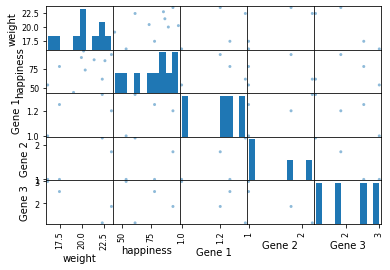

In [ ]:
pd.plotting.scatter_matrix(mouse_df);  # contained in the plotting submodule, accepts a DataFrame as the first argument.

## Saving data to file

Finally, getting data out:

There are a couple of useful ways to know about, DataFrames have a collection of methods if you type:

```
mouse_data.to_
```
and the tab completion should show you the different options, most of which should be clear. 

If you want to write to an Excel file (or write out to the source, if you imported from an Excel file), then the process is a bit more complicated, using an `ExcelWriteObject`. An example of this is provided below


In [ ]:
import os
# print(os.getcwd())
# mouse_df.to_csv("C:\\full\\path\\to\\my\\file\\my_mouse_file.csv")
# mouse_df.to_csv("./path/to/my/file/on/a/mac/my_mouse_file.csv")
mouse_df.to_excel("my_excel_file.xlsx", sheet_name="mouse_data_analysed")

/content


In [ ]:
with pd.ExcelWriter("location_to_save_file.xlsx", mode="a") as open_excel_file:  # with is a special Python keyword that is really helpful here. What it does is ensure the file gets closed when we're done.
    name_of_dataframe.to_excel(open_excel_file, sheet_name="output_data")

Note the syntax on the `with` keyword:

```
with file_opening_object as variable_name_of_opened_file:
    name_of_dataframe.to_excel(variable_name_of_opened_file, 
                               sheet_name="output_data")
```
If you don't use the with keyword, and there's an error, then the file never gets closed, and it can cause other issues. I would recommend using this any time you're explicitly using this method, or the `open` function. The `numpy` built-in, `genfromtxt` that many of you used last time deals with a lot of that for us, so doesn't need the `with` keyword syntax we're using here.


If you're working with a large volume of data, especially spread out over many files, using csv might not be the best idea.

Pandas [supports](https://pandas.pydata.org/docs/reference/io.html) many formats that I've never heard of until recently.

More on that [here](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d).




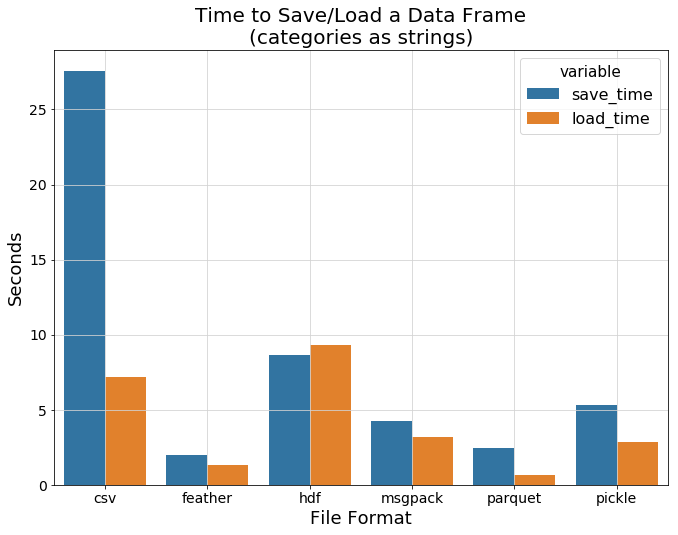

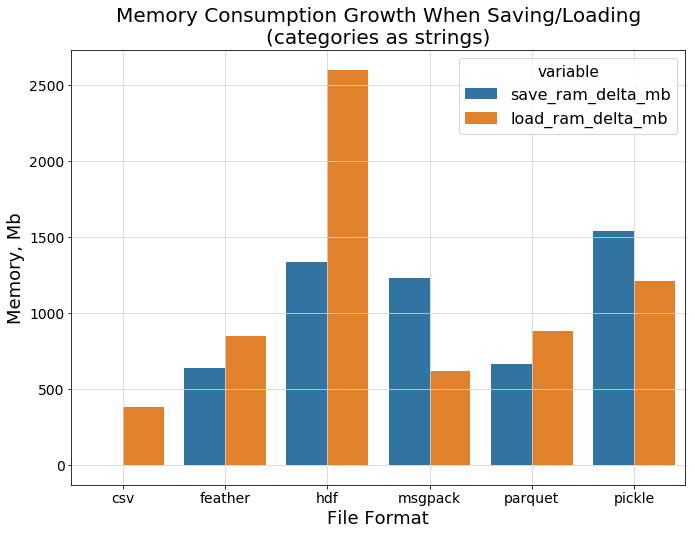

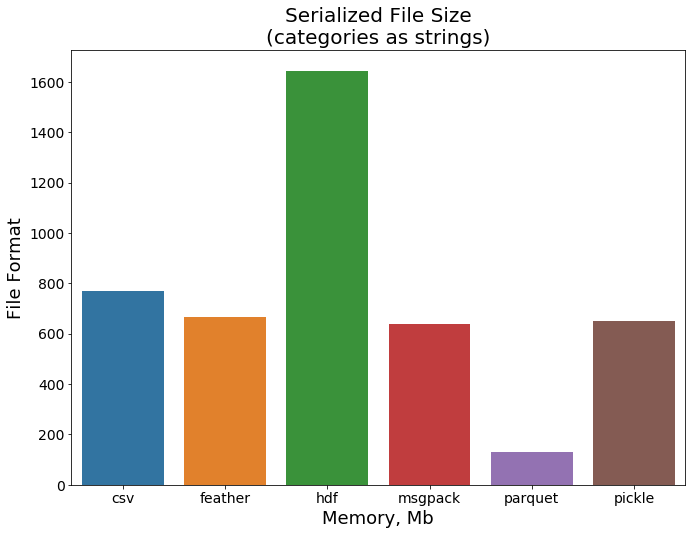

If you're working on data from DLC, you'll need to learn two more things:
* smaller one: how to read hdf files
* more challenging one: how to deal with MultiIndexing

#MultiIndexing
You can have more than one column in your index! Multiple levels in the index allow you to have a hierarchical structure of the row identifier.


In [ ]:
#Load your dlc data. Print the names of index
#column names

#Let's play with our tracking data. If you don't have your own, use the ones on the drive

1. Print the size of the table (rows and columns)
2. Find all the NaNs in your dataframe. Print the percentage of lost frames. Get rid of them in your preferred way (substitution, interpolation, etc.)
For DLC: interpolate low likelihood data
3. Plot the data.
4. Find instances where the flies teleport. Find the coordinates around which the tracked object changes from fly to noise. Propose a way to get rid of those chunks of df.
5. Calcuate the distance travelled
6. Add a column saying on which side the diode should be switched on during the closed loop experiment. You can either use that info for the next exercises, or extract the data about the diodes from Bonsai and add it to the dataframe, preferably using join or merge
7. Make a heatmap of time spent in different parts of the track. Play around with the size of spatial bin size. Make it dependent on the side where the light is
8. Calculate the direction in which the fly is moving. How does that depend on where the light is located?
9. Correct parts of the df where the light switches too often, basing on your chosen threshold
10. If you have data from more than one fly, compare their reaction time to the light stimulus
